In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv(r"C:\Users\Himanshu Kotkar\Downloads\Investor Decision-Making Survey (Responses) - Form Responses 1 (1).csv")

In [150]:
df.head(2)

,Timestamp,Name,Age,Gender,Occupation,How do u look at your investments ?,Information Source,Risk Tolerance,Investment Approach,What apps do you use for investing ?,Do you use technology or investment apps in your decision-making process?,Do you make your family members invest in the same stocks as you do or you let them try different stocks ?
0,11/21/2023 14:35:01,Shah Waseem,18-25,Male,Student,Long Term,"Financial news websites, Social media, Financi...",Cautious (I try to minimize risks),Value Investing: Looking for undervalued stock...,Groww,No,Yes
1,11/21/2023 17:33:29,Khan Sahab,18-25,Male,Student,Long Term,"Financial news websites, Investment apps, Fina...",Neutral(I'm comfortable with a balanced level ...,Growth Investing: Focusing on stocks with pote...,Groww,Yes,Yes


In [151]:
# Data Cleaning 
# Dropped Name and Timestamp Column
df.drop(columns=['Timestamp','Name'],inplace=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0   Age                                                                                                         80 non-null     object
 1   Gender                                                                                                      80 non-null     object
 2   Occupation                                                                                                  80 non-null     object
 3   How do u look at your investments ?                                                                         80 non-null     object
 4   Information Source                                                          

In [153]:
#Shortening the names
risk = {"Cautious (I try to minimize risks)":'Cautious',
        "Very cautious (I prefer low-risk investments)":'Very Cautious',
       "Neutral(I'm comfortable with a balanced level of risk)":'Neutral',
       "Willing to take risks (I'm open to moderate risk)":'Moderate Risk',
       "Very willing to take risks (I actively seek higher-risk opportunities)":'High Risk'}

In [154]:
df['Risk Tolerance'] = df['Risk Tolerance'].map(risk)
df['Risk Tolerance'].value_counts()

Neutral          26
Cautious         21
Very Cautious    19
Moderate Risk    11
High Risk         3
Name: Risk Tolerance, dtype: int64

In [155]:
#Shortening the names
inv_appr = {"Value Investing: Looking for undervalued stocks that have strong fundamentals.":'Value Investing',
            "Growth Investing: Focusing on stocks with potential for high future earnings growth.":'Growth Investing',
           "Technical Analysis: Analyzing charts and past market data to predict future price movements.":'Technical Analysis',
           "Fundamental Analysis: Examining a company's financial health, management, and industry position.":'Fundamental Analysis',
           "Dividend Investing: Choosing stocks that pay regular dividends for income.":"Dividend Investing"}

In [156]:
df['Investment Approach'] = df['Investment Approach'].map(inv_appr)
df['Investment Approach'].value_counts()

Growth Investing        35
Technical Analysis      22
Fundamental Analysis     9
Dividend Investing       9
Value Investing          5
Name: Investment Approach, dtype: int64

In [181]:
#Removing Unnecessary Values
values_to_remove = ['No', 'Anand Rathi','None']
df['What apps do you use for investing ?'] = df['What apps do you use for investing ?'].replace(values_to_remove, '')
#Replacing same words as one
word = {"":"Other"}
df['What apps do you use for investing ?'] = df['What apps do you use for investing ?'].replace(word)
df['What apps do you use for investing ?'].value_counts()

kite (zerodha)    31
upstox            18
groww             17
angel one          8
other              3
sharekhan          1
indmoney           1
sharekhan          1
Name: What apps do you use for investing ?, dtype: int64

In [182]:
df.head()

,Age,Gender,Occupation,How do u look at your investments ?,Information Source,Risk Tolerance,Investment Approach,What apps do you use for investing ?,Do you use technology or investment apps in your decision-making process?,Do you make your family members invest in the same stocks as you do or you let them try different stocks ?
0,18-25,Male,Student,Long Term,"Financial news websites, Social media, Financi...",Cautious,Value Investing,groww,No,Yes
1,18-25,Male,Student,Long Term,"Financial news websites, Investment apps, Fina...",Neutral,Growth Investing,groww,Yes,Yes
2,18-25,Male,Professional Job,Short Term,"Financial news websites, Social media, Recomme...",Very Cautious,Growth Investing,upstox,Yes,Yes
3,18-25,Male,Professional Job,Long Term,"Financial news websites, Investment apps, Soci...",Moderate Risk,Growth Investing,groww,No,Yes
4,18-25,Female,Student,Long Term,"Financial news websites, Investment apps, Soci...",Neutral,Growth Investing,kite (zerodha),Yes,Yes


Student             47
Professional Job    29
Business Owner       2
Professor            1
Service              1
Name: Occupation, dtype: int64


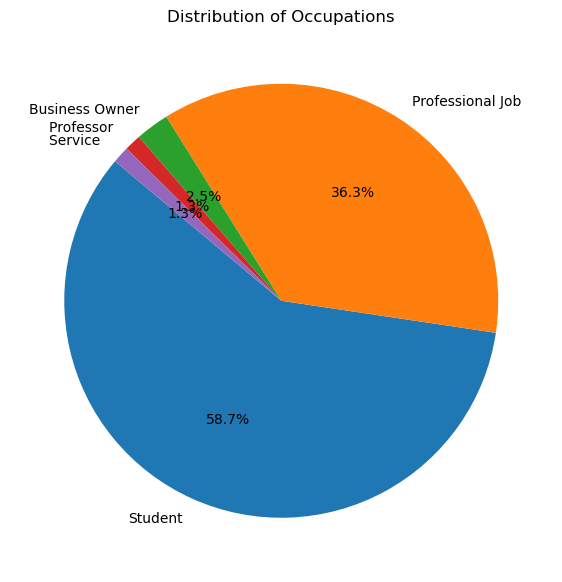

In [199]:
#Understanding Data
occup = df['Occupation'].value_counts()
print(occup)
plt.figure(figsize=(7, 12))
plt.pie(occup, labels=occup.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Occupations')
plt.show()

Long Term     60
Short Term    20
Name: How do u look at your investments ?, dtype: int64


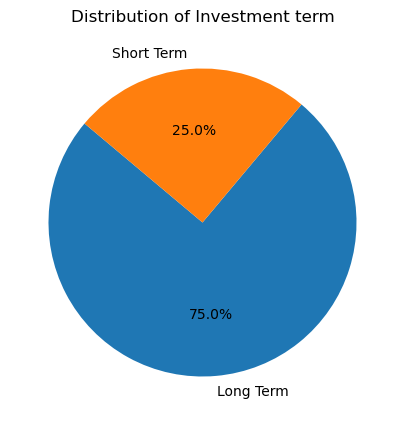

In [183]:
term = df['How do u look at your investments ?'].value_counts()
print(term)
plt.figure(figsize=(5, 5))
plt.pie(term, labels=term.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Investment term')
plt.show()

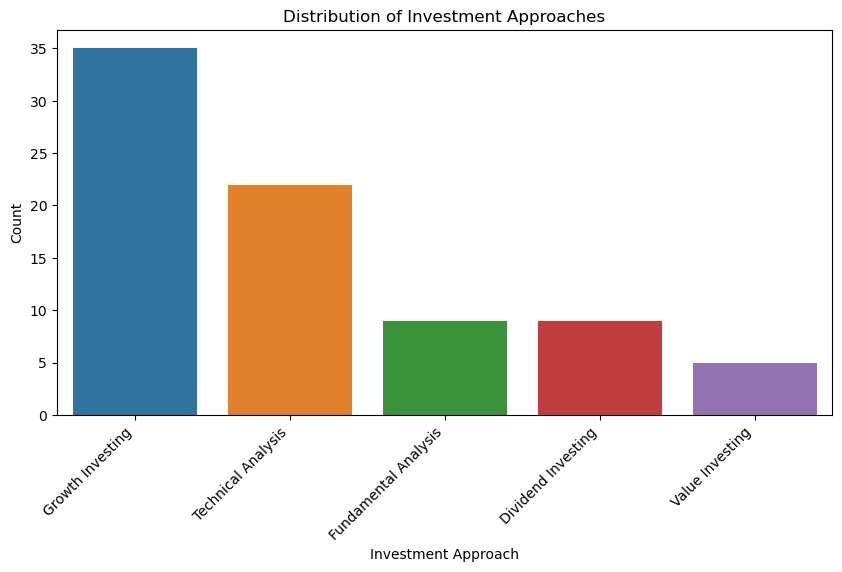

In [184]:
investment_approach_counts = df['Investment Approach'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=investment_approach_counts.index, y=investment_approach_counts.values)
plt.title('Distribution of Investment Approaches')
plt.xlabel('Investment Approach')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [185]:
info_source = df['Information Source'].str.split(', ', expand=True).stack().value_counts()
info_source

Financial news websites                   40
Social media                              39
Investment apps                           39
Recommendations from friends or family    33
Financial advisors                        32
Company reports and filings               16
Other                                      5
dtype: int64

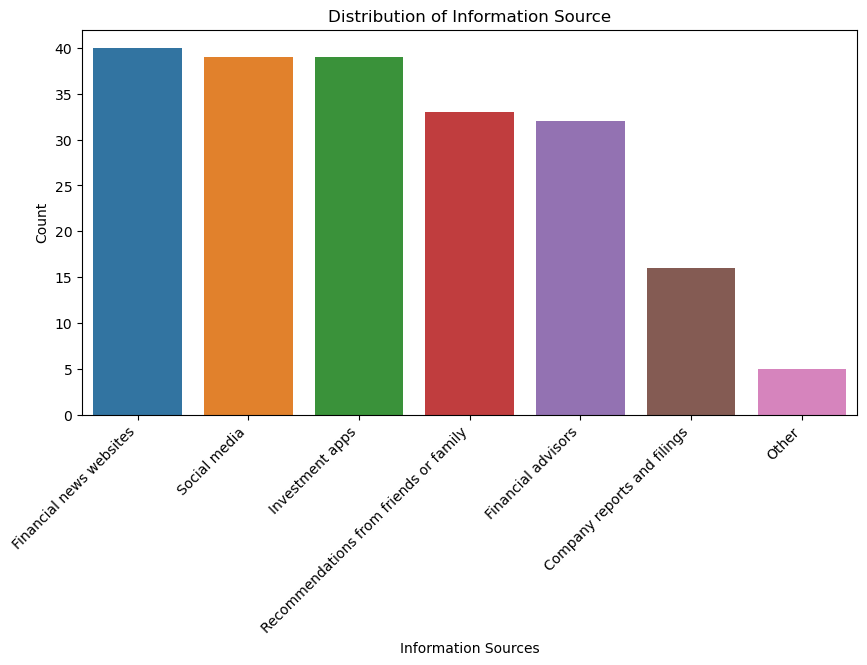

In [186]:
plt.figure(figsize=(10, 5))
sns.barplot(x=info_source.index, y=info_source.values)
plt.title('Distribution of Information Source')
plt.xlabel('Information Sources')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

kite (zerodha)    31
upstox            18
groww             17
angel one          8
other              3
sharekhan          1
indmoney           1
sharekhan          1
Name: What apps do you use for investing ?, dtype: int64


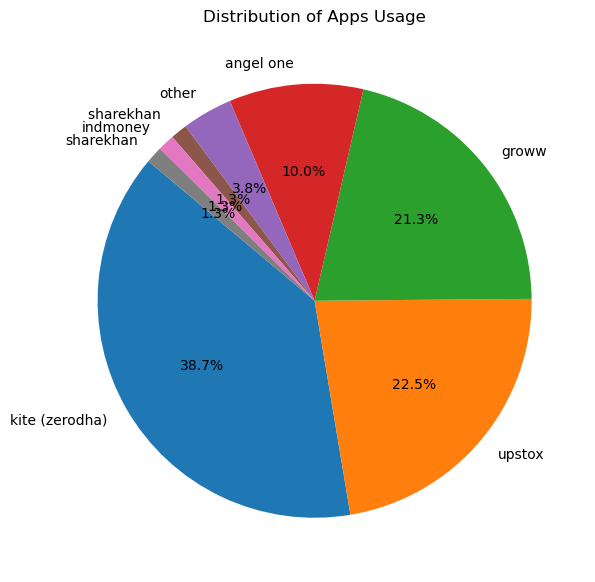

In [193]:
apps = df['What apps do you use for investing ?'].value_counts()
print(apps)
plt.figure(figsize=(7,12))
plt.pie(apps, labels=apps.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Apps Usage')
plt.show()

Yes    44
No     36
Name: Do you make your family members invest in the same stocks as you do or you let them try different stocks ?, dtype: int64


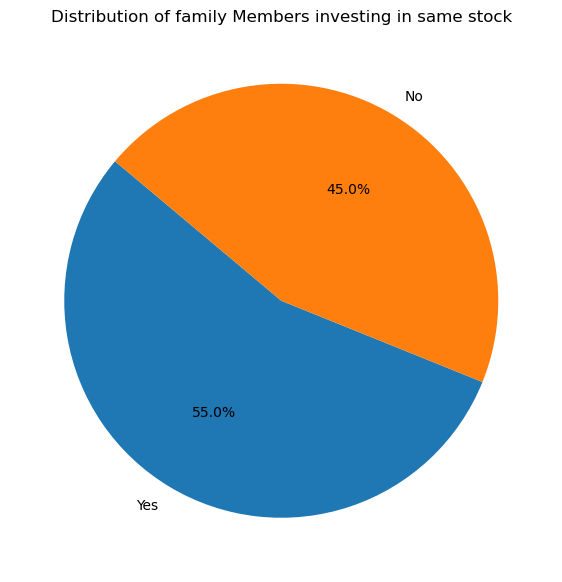

In [194]:
family = df['Do you make your family members invest in the same stocks as you do or you let them try different stocks ?'].value_counts()
print(family)
plt.figure(figsize=(7,12))
plt.pie(family, labels=family.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of family Members investing in same stock')
plt.show()

In [208]:
df['Information Source'] = df['Information Source'].str.lower()
information_source_dummies = df['Information Source'].str.get_dummies(sep=', ')
df_grouped = pd.concat([df, information_source_dummies], axis=1)
grouped_data = df_grouped.groupby('Occupation').sum()

C:\Users\Himanshu Kotkar\AppData\Local\Temp\ipykernel_13096\3268798255.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df_grouped.groupby('Occupation').sum()


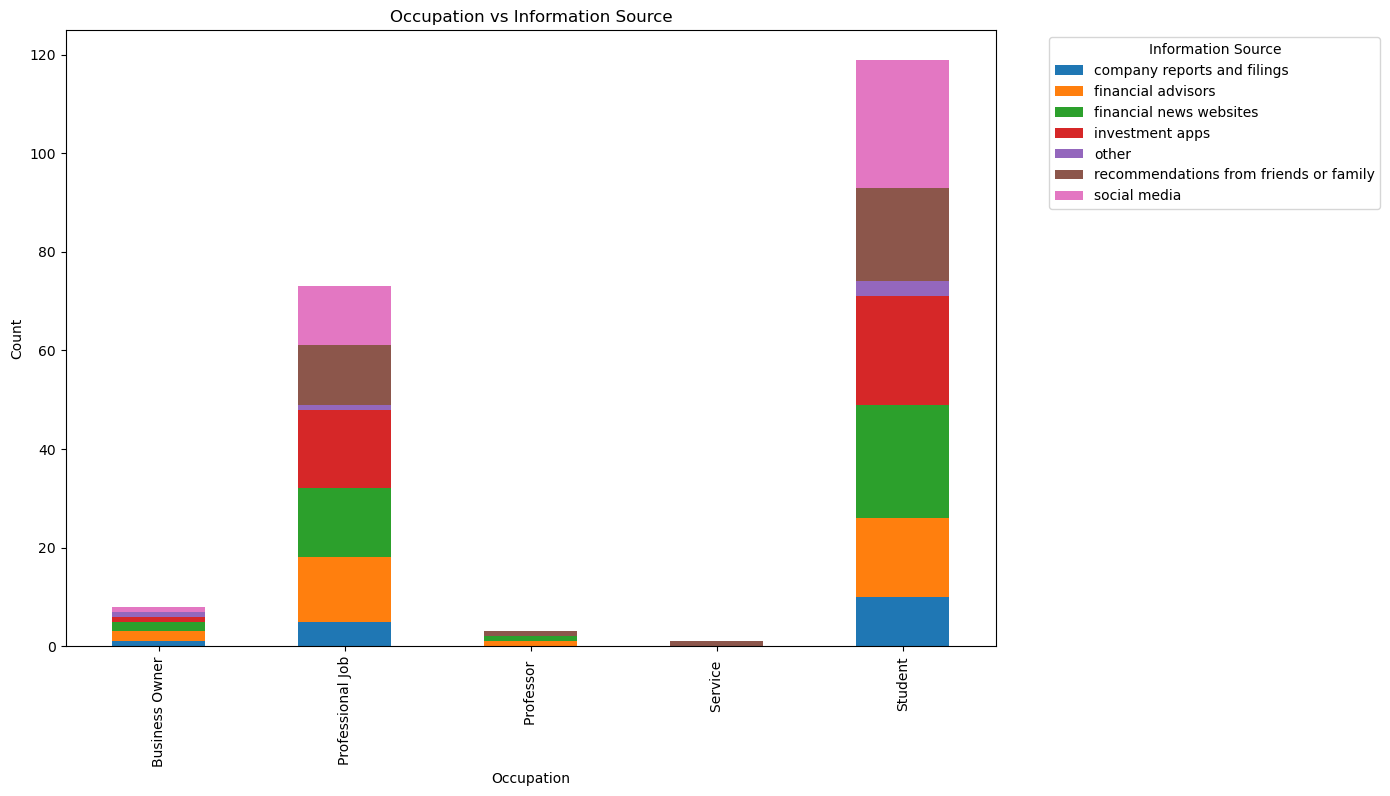

In [209]:
grouped_data.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Occupation vs Information Source')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Information Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

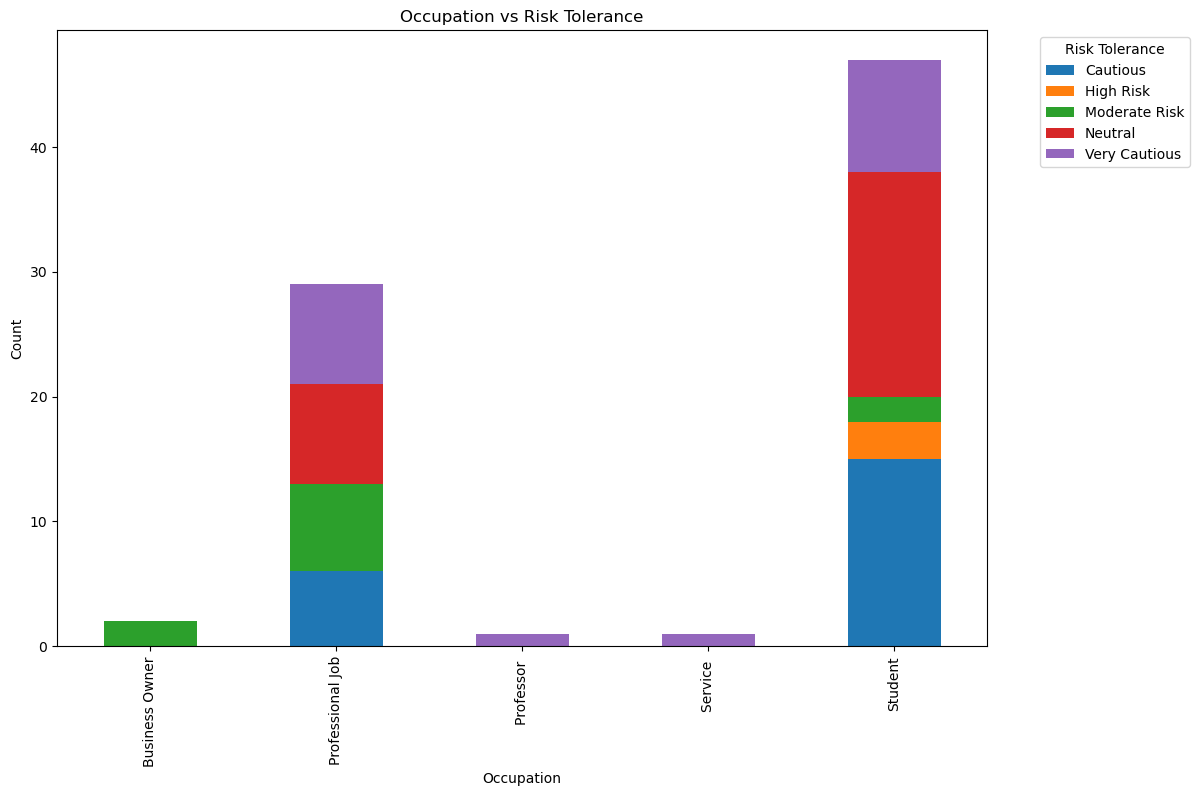

In [214]:
plot_data = df.groupby(['Occupation', 'Risk Tolerance']).size().unstack()

# Plot a grouped bar chart
plot_data.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Occupation vs Risk Tolerance')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Risk Tolerance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()